---
title: 'Лабораторна робота 3. OpenCV. Просторові методи обробки зображень І. Градаційні перетворення і гістограмні методи (short version)'
description:
   Документ зроблено за допомогою [Quarto](https://quarto.org/)
author: "&copy; [<span style='color: blue;'>Tereshchenko Daniil </span>](https://github.com/whytereshchenko/Tereshchenko_OpenCV), 2023"
date: "12.14.2023"
lang: ukr
format:
  html:
    code-fold: true
    toc: true # меню
    toc_float: # спливаюче меню  
      collapsed: true # авто
      number_sections: true
jupyter: python3
---

__Мета:__ _знайомство з поелементними і гістограмними просторовими методами обробки зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python._

::: callout-note
## Примітка
Попередньо потрібно опрацювати лекцію 10.
:::

## Що ви будете вміти?
* Виконувати градаційні перетворення
* Виконувати побудову гістограми матриці яскравостей зображення і виконувати наступні поелементні перетворення на її основі:
  * бінаризацію зображення
  * еквалізацію гістограми
  * соляризацію зображення
  * гамма-корекцію та логарифмічне перетворення
  * отримання негативу
* порівнювання гістограм
* Виконувати побудову гістограм для для кожного з R, G, B каналів

## Градаційні перетворення

__Градаційні перетворення__ задаються функцією перетворення інтенсивностей $s = T(r)$, де $T()$ - оператор перетворення для околу 1x1, тобто функція.  

Наведемо деякі приклади.

In [1]:
# Імпортуємо пакети
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# print(f'version cv2: {cv.__version__}')
print('version cv2: %s' % cv.__version__)

version cv2: 4.6.0


image shape/dimensions: (1306, 960, 3)
image number of pixels: 3761280
grey image shape/scale: (1306, 960)
grey image number of pixels: 1253760


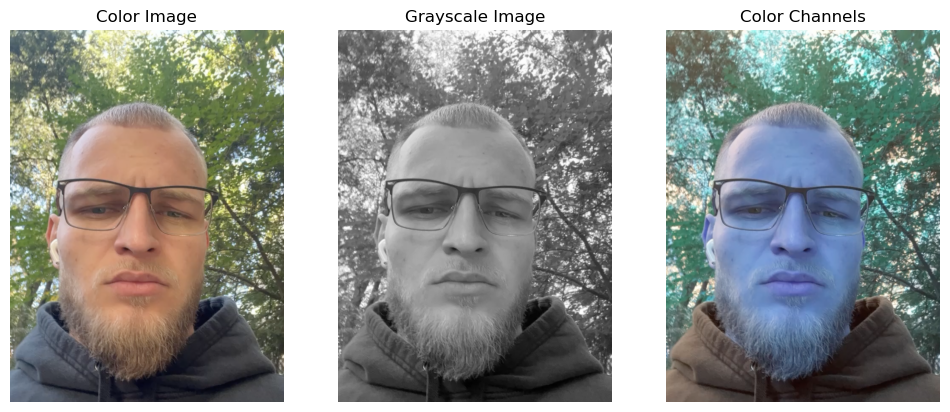

In [6]:
import cv2
import matplotlib.pyplot as plt 

image = cv2.imread('image/me.png')

print(f'image shape/dimensions: {image.shape}')
print(f'image number of pixels: {image.size}')

# Розділяємо зображення на окремі канали (червоний, зелений, синій).
red, green, blue = cv2.split(image)

# Зчитуємо зображення у відтінках сірого.
image_gray = cv2.imread('image/me.png', cv2.IMREAD_GRAYSCALE)

# Виводимо розміри напівтонового зображення.
print(f'grey image shape/scale: {image_gray.shape}')

# Виводимо загальну кількість пікселів у напівтоновому зображенні.
print(f'grey image number of pixels: {image_gray.size}')

# Візуалізуємо зображення засобами Matplotlib.

# Створюємо фігуру Matplotlib для розміщення графіків.
plt.figure(figsize=(12, 6))

# Перший графік - кольорове зображення.
plt.subplot(1, 3, 1)
# Виводимо кольорове зображення, конвертуючи його з BGR в RGB для Matplotlib.
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Color Image')  # Додаємо заголовок графіку.
plt.axis('off')  # Вимикаємо відображення координатних вісей.

# Другий графік - напівтонове зображення.
plt.subplot(1, 3, 2)
# Виводимо напівтонове зображення в градаціях сірого.
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')  # Додаємо заголовок графіку.
plt.axis('off')  # Вимикаємо відображення координатних вісей.

# Третій графік - окремі канали.
plt.subplot(1, 3, 3)
# Виводимо кольорове зображення, використовуючи окремі канали.
plt.imshow(cv2.merge([red, green, blue]))
plt.title('Color Channels')  # Додаємо заголовок графіку.
plt.axis('off')  # Вимикаємо відображення координатних вісей.

# Відображення усіх графіків.
plt.show()

### [Бінаризація зображення]()

Суть бінаризації напівтонового зображення полягає  у трансформації восьмибітного зображення у двобітне. Засобами _openCV_ це можна зробити наступним чином.

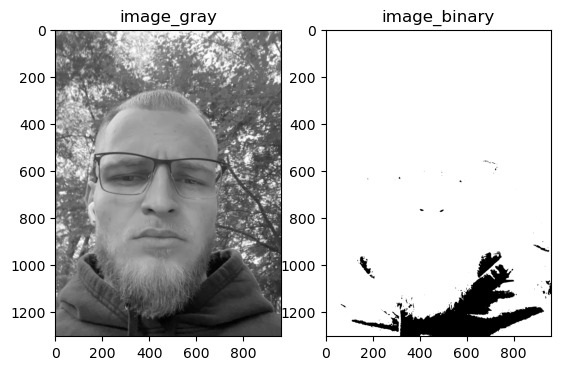

In [7]:
# Візуалізація за допомогою matplotlib
# plt.imread('rose.png')
plt.gray()
# plt.subplot(111)
# plt.imshow(image_gray)
# plt.title('Gray Image')
# plt.show()
# plt.savefig('Gray_image.png')

def image_gray_binary(image_input, threshold=50):
    # Бінаризація зображення

    image_output = image_input.copy()

    for row in range(0, image_input.shape[0]):
        for column in range(0, image_input.shape[1]):
            if image_input[row, column] <= threshold:
                image_output[row, column] = 0
            else:
                image_output[row, column] = 255
    return image_output

image_binary = image_gray_binary(image_gray)

# Побудова і вивід зображення у файл
plt.subplot(121)
plt.imshow(image_gray)
plt.title('image_gray')
plt.subplot(122)
plt.imshow(image_binary)
plt.title('image_binary')
# plt.savefig('image_binary.png')
plt.show()

__Завдання для самостійної роботи__.

  * Обгрунтувати оптимальне значення порогу бінаризації за допомогою гістограми
  * Написати код, який би виводив зображення засобами бібіліотеки _cv2_
  
  Альтернативний варіант з використанням методу бінарної класифікації можна реалізувати так.

Введіть поріг бінаризації:  100


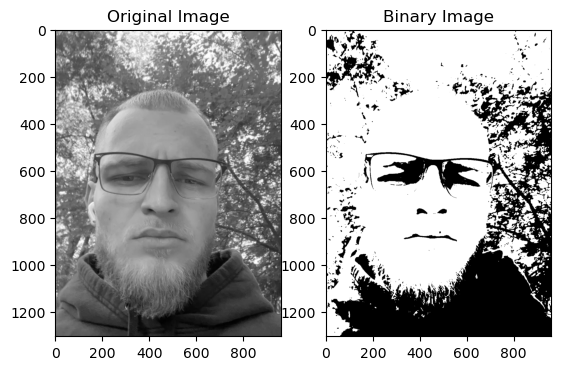

True

In [21]:
# # Вводимо поріг бінаризації:
# T = int(input('Введіть поріг бінаризації: '))
# r, threshold = cv.threshold(image_gray, T, 255, cv.THRESH_BINARY)

# # r - поріг бінаризації
# cv.imshow('image_gray', threshold)
# cv.waitKey(0)
# cv.destroyAllWindows()
# # Запис зображення на диск
# cv.imwrite('image_binary.png', threshold)

# Аб за допомогою такої конструкції
# img = cv.imread('grey_for_binary.png',0)
# cv.imshow('image',img)
# k = cv.waitKey(0)
# if k == 27:         # wait for ESC key to exit
#     cv.destroyAllWindows()
# elif k == ord('s'): # wait for 's' key to save and exit
#     cv.imwrite('image_2.png',img)
#     cv.destroyAllWindows()

import matplotlib.pyplot as plt

# Вводимо поріг бінаризації:
T = int(input('Введіть поріг бінаризації: '))

# Використання функції threshold OpenCV для бінаризації зображення.
# Зверніть увагу, що у Matplotlib для відтінків сірого немає необхідності вказувати другий параметр r.
threshold = cv.threshold(image_gray, T, 255, cv.THRESH_BINARY)[1]

# Візуалізація зображення та його бінаризованої версії.
plt.subplot(121)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(threshold, cmap='gray')
plt.title('Binary Image')

# Показуємо графіки.
plt.show()

# Зберігаємо бінаризоване зображення на диск.
cv.imwrite('image_binary.png', threshold)

### 1. [Негатив](https://www.geeksforgeeks.org/negative-transformation-of-an-image-using-python-and-opencv/)
$G(x,y)=L−1−F(x,y)$

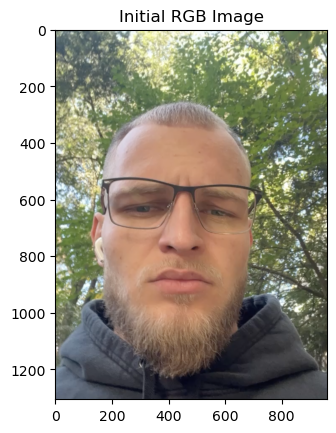

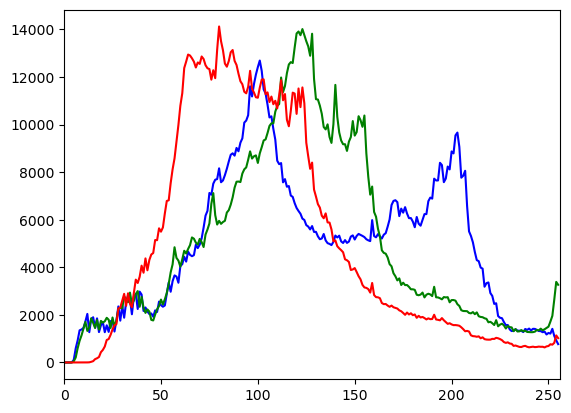

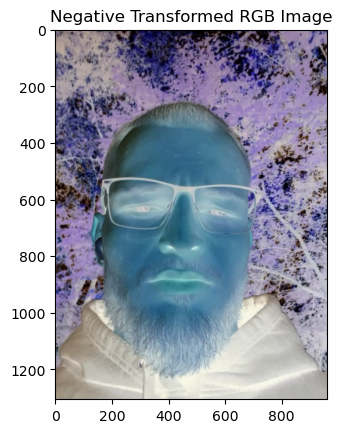

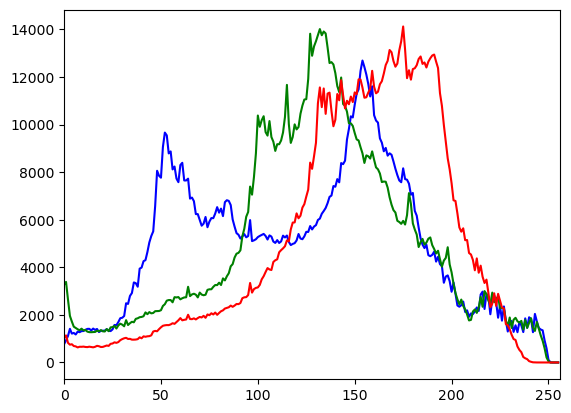

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def load_and_convert_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def plot_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

def plot_histogram(image):
    colors = ('b', 'g', 'r')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.show()

def apply_negative_transformation(image):
    return 255 - image

img_path = 'image/me.png'
img_rgb = load_and_convert_image(img_path)
plot_image(img_rgb, 'Initial RGB Image')
plot_histogram(img_rgb)

img_neg = apply_negative_transformation(img_rgb)
plot_image(img_neg, 'Negative Transformed RGB Image')
plot_histogram(img_neg)


### 2. [Логарифмічні перетворення](https://www.geeksforgeeks.org/log-transformation-of-an-image-using-python-and-opencv/?ref=rp) 

$G(x,y)=c⋅log(1+F(x,y))$

/var/folders/09/rt4x69394ps9m7hkhhf1p1240000gn/T/ipykernel_20736/1726441165.py:11: RuntimeWarning: divide by zero encountered in log
  return c * (np.log(image + 1))


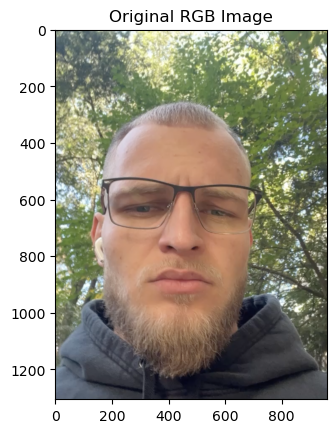

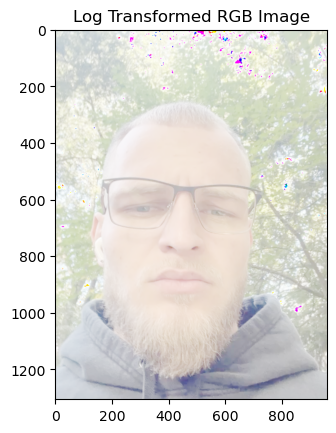

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def apply_log_transformation(image, scale_factor=255):
    c = scale_factor / np.log(1 + np.max(image))
    return c * (np.log(image + 1))

def display_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()


image_path = 'image/me.png'
image_rgb = load_image(image_path)

log_transformed_image = apply_log_transformation(image_rgb)
log_transformed_image = np.array(log_transformed_image, dtype=np.uint8)

display_image(image_rgb, 'Original RGB Image')
display_image(log_transformed_image, 'Log Transformed RGB Image')

### 3. [Степенева(гамма-коеркція)](https://issue.life/questions/53104983)

$G(x,y)=c⋅[F(x,y)]^γ$

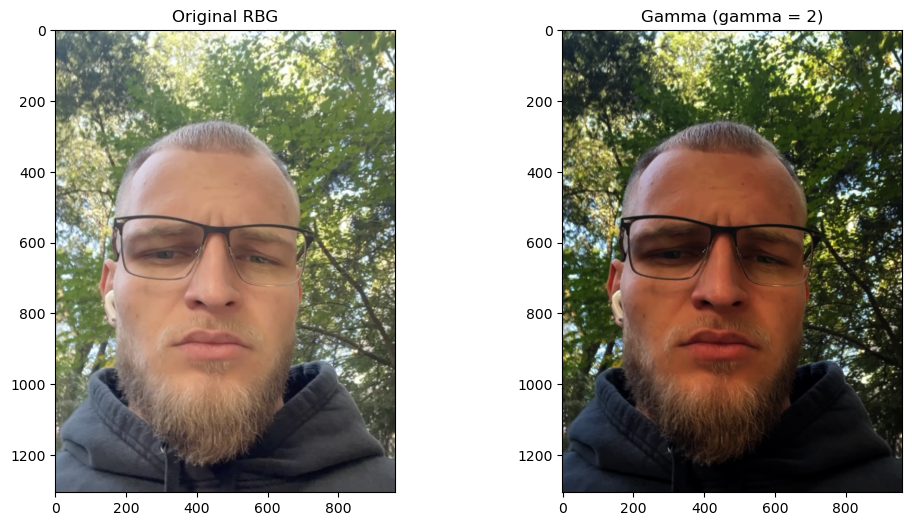

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_rgb_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def apply_gamma_correction(image, gamma_value):
    corrected_image = np.power(image / 255.0, gamma_value)
    return np.uint8(corrected_image * 255.0)

def display_images(images, titles, figsize=(12, 6)):
    fig, axes = plt.subplots(1, len(images), figsize=figsize)
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img)
        ax.set_title(title)
    plt.show()

image_path = 'image/me.png'
image_rgb = load_rgb_image(image_path)

gamma_value = 2
gamma_corrected = apply_gamma_correction(image_rgb, gamma_value)

display_images([image_rgb, gamma_corrected], 
               ['Original RBG', f'Gamma (gamma = {gamma_value})'])


### 4. [Соляризація зображення]()

$G(x,y)=L−1−∣F(x,y)−\frac{L−1}{2}∣$

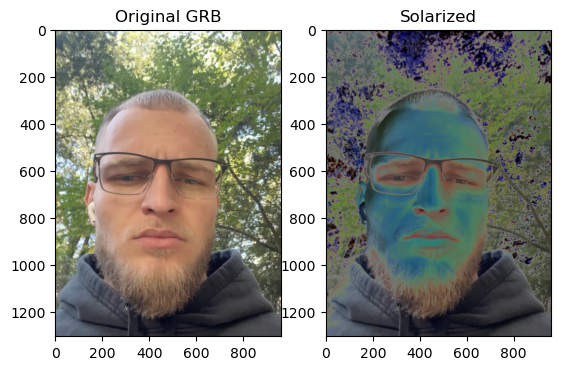

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    return cv2.imread(path)

def solarize_image(image, threshold=128):
    channels = cv2.split(image)
    solarized_channels = [np.where(c < threshold, c, 255 - c) for c in channels]
    return cv2.merge(solarized_channels)

def display_images(original, modified, titles=('Original', 'Modified')):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(titles[0])

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(modified, cv2.COLOR_BGR2RGB))
    plt.title(titles[1])

    plt.show()

image_path = 'image/me.png'
image = load_image(image_path)

solarized_image = solarize_image(image)

display_images(image, solarized_image, ('Original GRB', 'Solarized'))


## Відозміна гістограми

### 5. [Еквалізація гістограми](https://habr.com/ru/post/244507/)

Завдяки застосуванню еквалізації гістограми до зображення, було досягнуто помітного покращення у контрасті та яскравості. Аналіз гістограми після еквалізації показує більш однорідний розподіл інтенсивностей пікселів, що допомагає вирівняти яскравість у різних каналах. Такі зміни зробили зображення значно чіткішим і деталізованішим, збільшуючи кількість візуальної інформації.

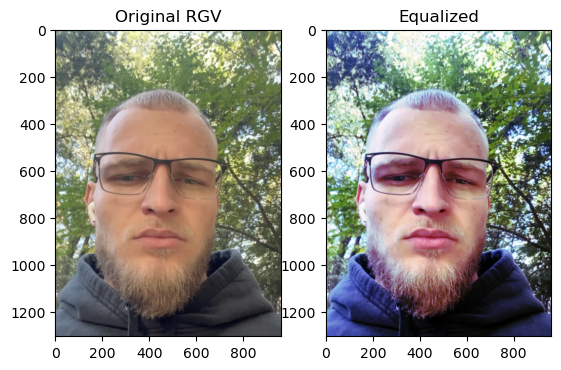

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def equalize_color_channels(image):
    channels = cv2.split(image)
    equalized_channels = [cv2.equalizeHist(c) for c in channels]
    return cv2.merge(equalized_channels)

def display_comparative_images(original, modified, titles=('Original Image', 'Modified Image')):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(titles[0])

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(modified, cv2.COLOR_BGR2RGB))
    plt.title(titles[1])
    
    plt.show()

image_path = 'image/me.png'
image = cv2.imread(image_path)

equalized_image = equalize_color_channels(image)

display_comparative_images(image, equalized_image, ('Original RGV', 'Equalized'))


### 6. [Оцінка гістограми](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga6ca1876785483836f72a77ced8ea759a)

[Ще одне посилання](https://docs.opencv.org/master/d8/dbc/tutorial_histogram_calculation.html)

Еквалізація гістограми ефективно використана на зображенні, що призвело до підвищення контрасту та яскравості. Аналіз після еквалізації показує, що інтенсивність пікселів тепер розподілена більш рівномірно по кольорових каналах, що забезпечує вирівнювання яскравості. Це зробило зображення яскравішим та дозволило виділити більше деталей. Еквалізація гістограми допомогла усунути проблеми з низьким контрастом і насиченістю кольорів, що є корисним для подальшої обробки зображення. Завдяки цьому методу, візуальний вигляд зображення значно покращився, підвищуючи його якість.

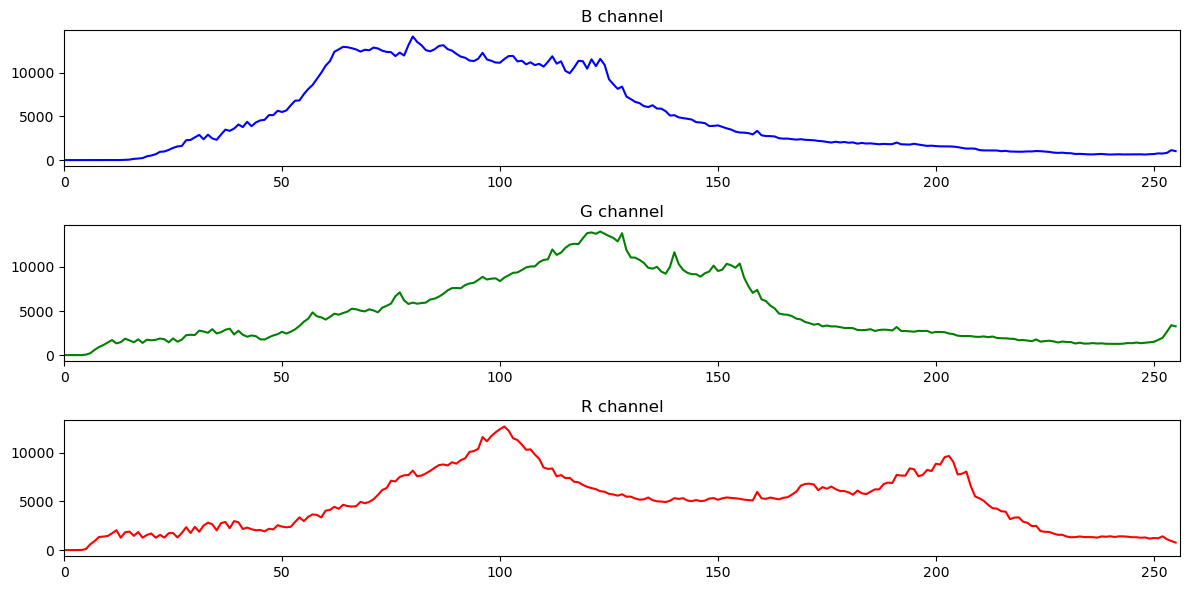

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(channel, channel_color):
    return cv2.calcHist([channel], [0], None, [256], [0, 256]), channel_color

def display_histograms(histograms, titles, figsize=(12, 6)):

    plt.figure(figsize=figsize)
    for i, (hist, color) in enumerate(histograms):
        plt.subplot(len(histograms), 1, i + 1)
        plt.plot(hist, color=color)
        plt.title(titles[i])
        plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

image_path = 'image/me.png'
image = cv2.imread(image_path)

b, g, r = cv2.split(image)

hist_b, color_b = calculate_histogram(b, 'blue')
hist_g, color_g = calculate_histogram(g, 'green')
hist_r, color_r = calculate_histogram(r, 'red')

display_histograms([(hist_b, color_b), (hist_g, color_g), (hist_r, color_r)],
                   ['B channel', 'G channel', 'R channel'])


## Завдання для самостіної роботи

1. Створити Notebook-документ `<lab_3_StudentLastName>` за допомогою Jupyter Notebook або Jupyter Lab. (Див. [тут](https://devpractice.ru/python-lesson-1-install/), [тут](https://devpractice.ru/python-lesson-6-work-in-jupyter-notebook/) і [тут](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)).

1. Відобразити в робочому документі ("зошиті" ipython) виконання пунктів 1-6 наведених нижче, скориставшись інтерактивними посиланнями на відповідну документацію. __В якості зображення використати власний портрет, отриманий за допомогою цифрової камери__

1. Робочий документ оформити у вигляді Notebook-документу (файл __.ipynb__).

1. Дати відповіді на контрольні запитання.

1. Скомпілювати звіт у форматі __.html__. Для цього необхідно завантажити термінал і у командному рядку запустити наступну команду:

`jupyter nbconvert lab_3_StudentLastName.ipynb --to html` або за допомогою Qurto:  
`quarto preview lab_3_StudentLastName.ipyn`

6. Представити звіт у вигляді архіву. Проект має складатися мінімум з двох файлів: `lab_3_StudentLastName.ipynb` та `lab_1_StudentLastName.html`

## Контрольні запитання

1. У чому полягає сенс градаційних перетворень? -Градаційні перетворення впливають на інтенсивність та кольорову палітру зображення, забезпечуючи можливість адаптувати контраст, яскравість та інші аспекти зовнішнього вигляду. Вони включають:

- Контраст: Модифікація контрасту може підсилити або зменшити яскравість, збільшуючи або згладжуючи деталі.
- Яскравість: Регулювання яскравості змінює загальний рівень освітленості на зображенні.
- Насиченість: Модифікація насиченості впливає на виразність кольорів.
- Тон і Відтінок: Зміна цих параметрів дозволяє коректувати колірне сприйняття зображення.
- Експозиція: Коригування експозиції визначає, наскільки світлим або темним буде зображення.

1. На чому ґрунтуються гістограмні методи? - Методи, що базуються на аналізі гістограми зображення, вивчають розподіл яскравості пікселів. Вони дозволяють оцінювати контраст, експозицію та рівномірність інтенсивностей. Якщо гістограма розширена, це свідчить про високий контраст, тоді як стиснута гістограма сигналізує про низький контраст. Графічне представлення гістограми також корисне для виявлення пересвітлених або затемнених ділянок зображення, що важливо для його корекції. Гістограмні методи є важливим інструментом у обробці зображень для налаштування та покращення їхніх властивостей.


## References

1. [Anaconda (Python distribution).](https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution))
2. [Conda.](https://conda.io/en/latest/)
3. [Histograms.](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga6ca1876785483836f72a77ced8ea759a)
4. [Histogram Calculation.](http://habrahabr.ru/post/115903/)
5. [Image Processing (imgproc module).](https://docs.opencv.org/master/d7/da8/tutorial_table_of_content_imgproc.html)